In [3]:
%matplotlib inline


# Normalized Cut


This example constructs a Region Adjacency Graph (RAG) and recursively performs
a Normalized Cut on it [1]_.

References
----------
.. [1] Shi, J.; Malik, J., "Normalized cuts and image segmentation",
       Pattern Analysis and Machine Intelligence,
       IEEE Transactions on, vol. 22, no. 8, pp. 888-905, August 2000.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


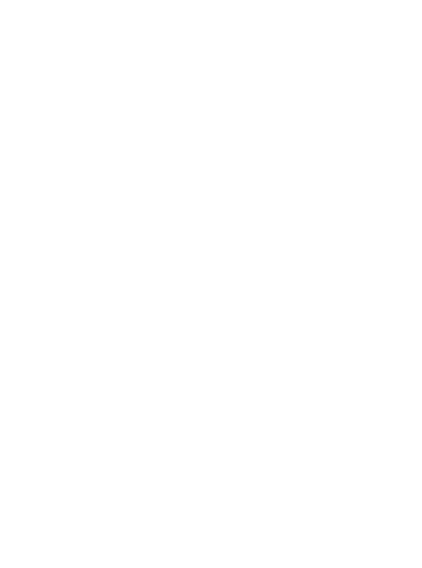

In [2]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import cv2

img = data.coffee()

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))
 
ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()